# Fradulent Transaction Detection :

    As we all know organizations across the globe have adopted e-transactions in order to increase their productivity, expand their buisness and provide 24x7 services because of which the last two decades have witnessed an exponential rise in the use of card payments and e-transactions. Along with the increase in the no. of e-transactions there has been a tremendous rise in the fraud rate as well. Even if the fraud to genuine transaction ratio has been 3:100, the monetary loss is reported to be in billions of dollars.

## Problem Statement :

Build a predictive model that detects fradulent transaction on the basis of the provided transaction details of a bank. The entire information is provided in 6 parts.
- 1. Training Data : Contains masked variable pertaining to each transaction id.
- 2. Test Data : Contains masked variable pertaining to each transaction id without the target variable.
- 3. geo_score : Location of the transaction
- 4. lambda_wts : Own proprietary index
- 5. instance_score : On network turn around time
- 6. qset_tats : Vulnerability qualification score.

# Import Basic Libraries :

In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import Datasets :

In [2]:
url_geo = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\Geo_scores.csv'
geo_score = pd.read_csv(url_geo)

url_lambda = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\Lambda_wts.csv'
lambda_wts = pd.read_csv(url_lambda)

url_qset = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\Qset_tats.csv'
qset_tats = pd.read_csv(url_qset)

url_instance = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\instance_scores.csv'
instance = pd.read_csv(url_instance)

url_train = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\train.csv'
train = pd.read_csv(url_train)

url_test = r'D:\Learn_Bay_Project_Session\Banking_Finance_Domain_ML_Project\Data_Sets\test_share.csv'
test = pd.read_csv(url_test)

In [3]:
print(geo_score.head())
print('*'*90)
print(lambda_wts.head())
print('*'*90)
print(instance.head())
print('*'*90)
print(qset_tats.head())
print('*'*90)
print(train.head())
print('*'*90)
print(test.head())

       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55
******************************************************************************************
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83
******************************************************************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84
******************************************************************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525                  1.03
3  160765                -11.63
4  138220                 -4.48
******************************************************************************************
       id   Group      P

## Observations :
- 1. We need to combine all the six datasets together to get all the information in a single table.
- 2. Common column in Train, Test, geo_score, instance_score and qset_tats is 'id'.
- 3. Common column in Train, Test and lambda_wts is 'group'.

# Data Preprocessing :

## Shape of the Datasets :

In [4]:
print("geo_score : ",geo_score.shape)
print('*'*20)
print("lambda_wts : ",lambda_wts.shape)
print('*'*20)
print("instance : ",instance.shape)
print('*'*20)
print("qset_tats : ",qset_tats.shape)
print('*'*20)
print("train : ",train.shape)
print('*'*20)
print("test : ",test.shape)

geo_score :  (1424035, 2)
********************
lambda_wts :  (1400, 2)
********************
instance :  (1424035, 2)
********************
qset_tats :  (1424035, 2)
********************
train :  (227845, 28)
********************
test :  (56962, 27)


## Observation :
- 1. Ideally no. of obsrvations in train and test dataset together should be equal to the no of observations in each of geo_score, instance_score, qset_tats and lambda_wts.
- 2. But here that is not the case that indicates we need to perform preprocessing before merging them.

## Handling missing Values :

In [5]:
print(geo_score.isnull().sum())
print('*'*50)
print(lambda_wts.isnull().sum())
print('*'*50)
print(instance.isnull().sum())
print('*'*50)
print(qset_tats.isnull().sum())
print('*'*50)
print(train.isnull().sum())
print('*'*50)
print(test.isnull().sum())

id               0
geo_score    71543
dtype: int64
**************************************************
Group        0
lambda_wt    0
dtype: int64
**************************************************
id                 0
instance_scores    0
dtype: int64
**************************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
**************************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [6]:
print(geo_score.isnull().sum()/len(geo_score)*100)
print('*'*50)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.000000
geo_score    5.023964
dtype: float64
**************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


## Observation :
- 1. geo_score dataset has 5% missing values.
- 2. qset_tats dataset has 7% missing values.

In [7]:
print(geo_score.info())
print('*'*70)
print(qset_tats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [8]:
print(geo_score.describe())
print('*'*50)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
**************************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [9]:
print(geo_score.mean())
print('*'*50)
print(qset_tats.mean())

id           142403.000000
geo_score        -0.000009
dtype: float64
**************************************************
id                      142403.000000
qsets_normalized_tat         0.000011
dtype: float64


In [10]:
print(geo_score.median())
print('*'*50)
print(qset_tats.median())

id           142403.00
geo_score         0.18
dtype: float64
**************************************************
id                      142403.00
qsets_normalized_tat         0.02
dtype: float64


- As both the columns are of numerical type we will impute the missing values using median approach.

In [11]:
geo_score.fillna(0.18,inplace=True)
qset_tats.fillna(0.02,inplace=True)

In [12]:
print(geo_score.isnull().sum()/len(geo_score)*100)
print('*'*50)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.0
geo_score    0.0
dtype: float64
**************************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


- Now there is no missing Values.

- Let's check the unique 'id' and 'group' in each dataset 

In [13]:
print("geo_scores : ",geo_score['id'].nunique())
print('*'*30)
print("lambda_wts : ",lambda_wts['Group'].nunique())
print('*'*30)
print("instance : ",instance['id'].nunique())
print('*'*30)
print("qset_tats : ",qset_tats['id'].nunique())
print('*'*30)
print("train id : ",train['id'].nunique())
print('*'*30)
print("train group : ",train['Group'].nunique())
print('*'*30)
print("test id : ",test['id'].nunique())
print('*'*30)
print("test group : ",test['Group'].nunique())
print('*'*30)

geo_scores :  284807
******************************
lambda_wts :  1400
******************************
instance :  284807
******************************
qset_tats :  284807
******************************
train id :  227845
******************************
train group :  1301
******************************
test id :  56962
******************************
test group :  915
******************************


## Observation :
- 1. Total no. of unique 'id' in train and test together is equal to the total no. of unique 'id' in each of geo_score, instance_score and qset_tats dataset.

- Now we will append the testing dataset with the training dataset.

In [14]:
train['data'] = 'train'
test['data'] = 'test'

In [15]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [16]:
pd.set_option('display.max_column',30)

In [17]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,0.546667,0.530000,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,0.966667,0.760000,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,0.826667,0.826667,0.653333,0.663333,0.453333,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,0.900000,0.433333,0.230000,1.323333,0.403333,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,0.853333,0.583333,0.850000,1.090000,0.550000,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [18]:
train.shape

(227845, 29)

In [19]:
test.shape

(56962, 28)

In [20]:
# Append Both Train and Test Data Together :

all_data = pd.concat([train,test], axis=0)

In [21]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [22]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,0.586667,0.660000,0.970000,0.796667,0.626667,0.636667,0.700000,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,0.293333,0.940000,0.896667,0.983333,0.936667,0.576667,0.643333,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,0.480000,0.490000,1.023333,0.310000,0.906667,0.450000,0.536667,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,0.500000,0.896667,0.876667,0.683333,0.850000,0.573333,0.643333,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,0.266667,0.586667,0.793333,0.780000,0.493333,0.623333,0.553333,0.543333,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


## Checking For missing values in combined dataset :

In [23]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

## Observation:
- There isn't any missing values in the combined dataset other than the target variables in the test data.

In [24]:
all_data['id'].nunique()

284807

In [25]:
print("geo_score : ",geo_score.shape)
print('*'*20)
print(lambda_wts.shape)
print('*'*20)
print(instance.shape)
print('*'*20)
print(qset_tats.shape)

geo_score :  (1424035, 2)
********************
(1400, 2)
********************
(1424035, 2)
********************
(1424035, 2)


In [26]:
geo_score = geo_score.groupby('id').mean()
instance = instance.groupby('id').mean()
qset_tats = qset_tats.groupby('id').mean()

In [27]:
print("geo_score : ",geo_score.shape)
print('*'*30)
print("instance : ",instance.shape)
print('*'*30)
print("qset_tats : ",qset_tats.shape)

geo_score :  (284807, 1)
******************************
instance :  (284807, 1)
******************************
qset_tats :  (284807, 1)


- Now we will merge geo_score, instance_score and qset_tats datasets one by one with the combined dataset on the basis of 'id' column.

In [28]:
all_data = pd.merge(all_data, geo_score, on='id', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [29]:
all_data = pd.merge(all_data, instance, on='id', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,...,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,...,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,...,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,...,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,...,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,...,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [30]:
all_data = pd.merge(all_data, qset_tats, on='id', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,...,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,...,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,...,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,...,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,...,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630


- Now we will merge lambda_wts dataset with the combined dataset on the basis of 'group' column.

In [31]:
all_data['Group'].nunique()

1400

In [32]:
lambda_wts['Group'].nunique()

1400

In [33]:
all_data = pd.merge(all_data, lambda_wts, on='Group', how='left')
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


# Checking For Outliers :

In [34]:
all_data.describe()

,id,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,227845.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,142403.000000,0.666669,0.666666,0.666665,0.666666,0.666667,0.666666,0.666667,0.666664,0.666668,0.666664,0.666670,0.666667,0.666665,0.666665,...,0.666669,0.666667,0.666668,0.666666,0.666668,0.666666,0.666667,0.666666,0.666666,-227.912595,0.001729,0.009034,-0.000003,0.001460,0.000004
std,82216.843396,0.652899,0.550440,0.505418,0.471957,0.460087,0.444089,0.412366,0.398119,0.366207,0.340239,0.331760,0.305107,0.292087,0.279393,...,0.256977,0.244841,0.241904,0.208158,0.201885,0.173765,0.160745,0.134550,0.110035,62.530027,0.041548,0.999331,1.088851,0.849345,0.958606
min,0.000000,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.933333,-1.263333,-0.833333,-4.043333,-2.500000,...,-17.500000,-10.943333,-2.976667,-14.270000,-0.280000,-2.766667,-0.200000,-6.856667,-4.476667,-250.000000,0.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,71201.500000,0.360000,0.466667,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,0.450000,0.473333,0.510000,0.500000,...,0.596667,0.590000,0.486667,0.613333,0.550000,0.560000,0.556667,0.643333,0.650000,-248.600000,0.000000,-0.394000,-0.540000,-0.480000,-0.430000
50%,142403.000000,0.673333,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,0.663333,0.683333,0.690000,0.666667,...,0.646667,0.656667,0.670000,0.663333,0.680000,0.673333,0.650000,0.666667,0.670000,-244.500000,0.000000,0.150000,-0.090000,-0.066000,0.050000
75%,213604.500000,1.106667,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,0.886667,0.883333,0.840000,0.833333,...,0.710000,0.730000,0.843333,0.716667,0.813333,0.783333,0.746667,0.696667,0.693333,-230.708750,0.000000,0.630000,0.450000,0.400000,0.490000
max,284806.000000,1.483333,8.020000,3.793333,6.293333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,3.043333,3.626667,6.440000,2.346667,...,13.806667,9.733333,4.166667,8.176667,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,1.000000,7.850000,23.750000,9.250000,10.530000


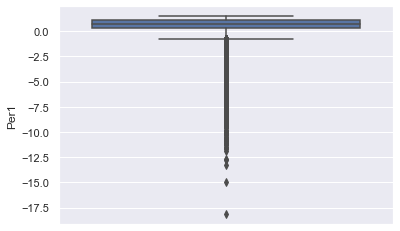

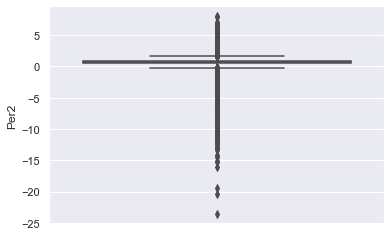

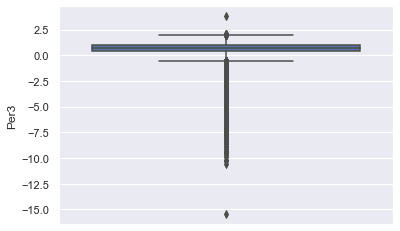

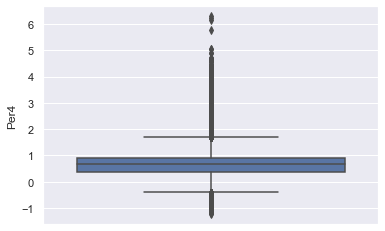

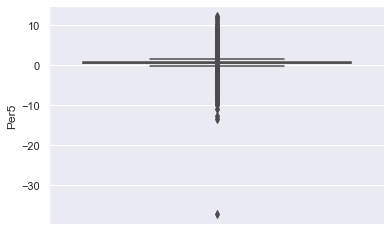

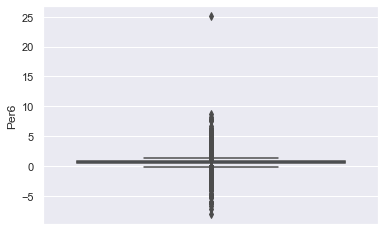

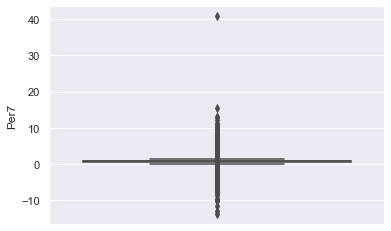

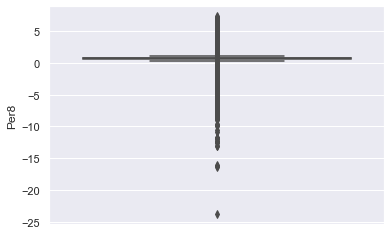

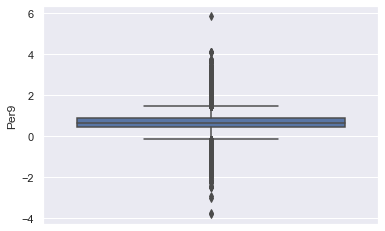

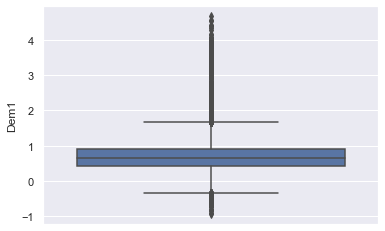

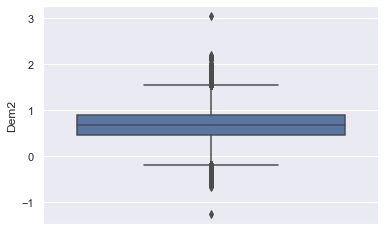

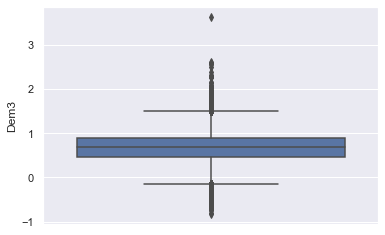

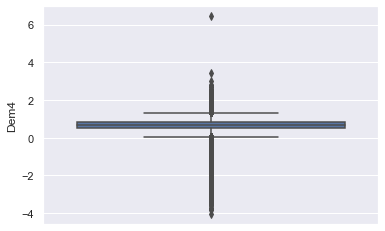

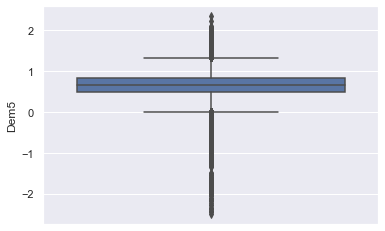

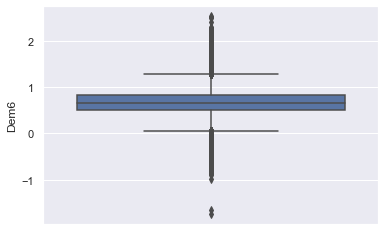

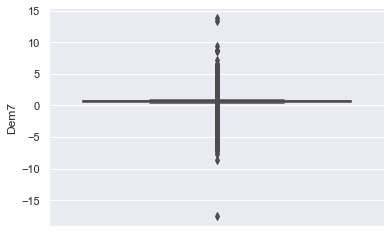

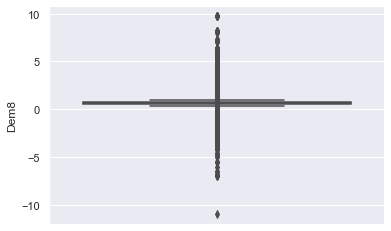

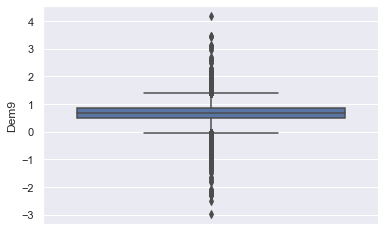

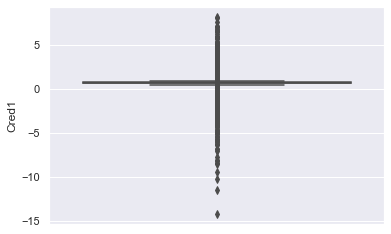

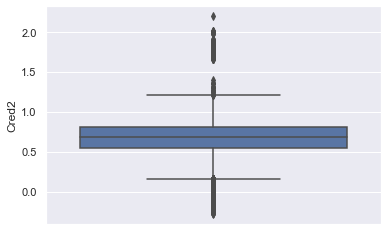

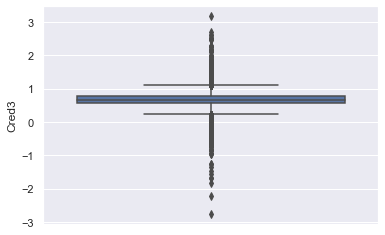

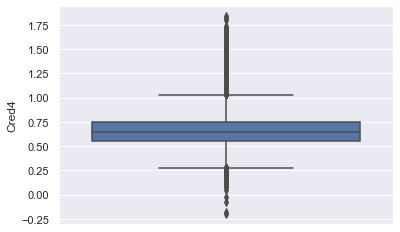

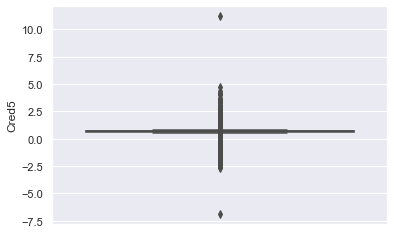

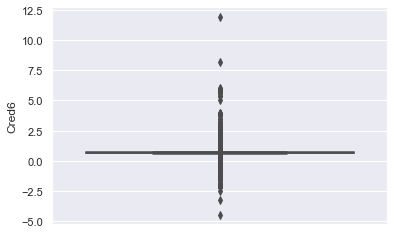

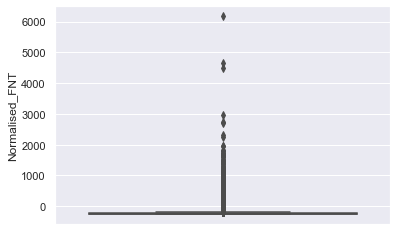

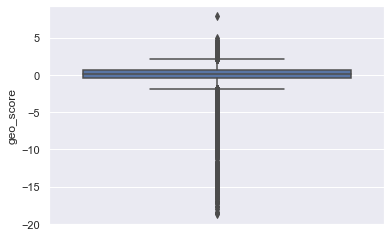

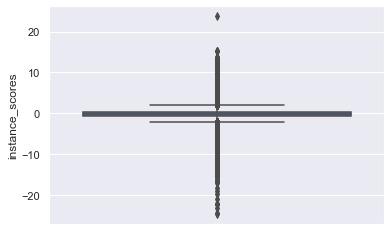

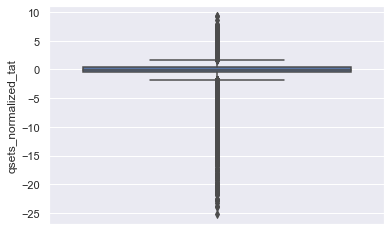

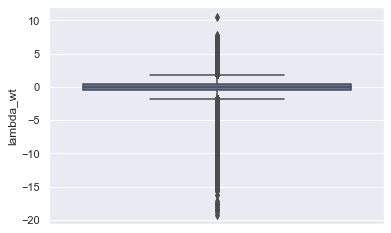

In [35]:
for cols in list(all_data.drop(['id','Group','Target','data'],axis=1).columns):
    sns.boxplot(y=all_data[cols])
    plt.show()

## Observation :
- All the variables of traing and test dataset have outliers.
- As these variables aremasked variable and we do not know what exactly these variables means we will not impute the outliers.

- Now we will drop the insignificant columns like 'id', 'Group' from the dataset

In [36]:
all_data = all_data.drop(['id','Group'],axis=1)
all_data.shape

(284807, 31)

# Feature Scaling :

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X = all_data.drop(['Target','data'], axis=1)
rest_col = all_data[['Target','data']]

In [40]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,0.617755,-0.157449,-0.369328,0.211885,1.231653,2.987397,-0.792180,0.862397,0.537035,-0.607409,-0.070341,0.229426,0.308135,0.524955,0.098287,-0.000010,0.054454,0.248026,-0.288238,1.700638,1.534647,-0.394004,0.148646,0.060594,-0.285262,0.247131,-0.055101,-0.825884,-0.135618
1,-0.296120,0.981037,0.428692,1.617382,0.130409,-0.090071,0.347587,0.293052,-1.301635,-0.578018,-0.160768,0.710131,-0.045642,-0.727763,-0.675636,-0.324293,0.204211,0.316924,0.064058,0.115571,-0.613853,0.020732,-0.842315,-0.121167,-0.321245,-0.259208,0.477571,0.163115,0.688497
2,0.709653,-0.950756,0.554001,-1.151235,-1.275126,0.382808,-1.479274,0.226070,-1.201510,-0.019587,0.190893,0.677356,0.878743,1.992424,0.073718,-0.233494,0.095297,0.633854,-0.320265,-1.403452,0.556312,0.020732,0.148646,0.060594,-0.083359,-0.959678,1.432708,-0.507992,-0.532028
3,-0.045953,0.769084,0.164884,0.579151,0.166635,-0.720577,0.703259,-0.083721,-0.491528,1.263826,-0.602855,0.010923,-0.479304,0.417579,0.700227,0.194560,0.217825,0.964563,0.064058,0.891593,-1.400358,-0.912425,1.337800,0.848223,-0.349671,0.481289,0.642883,-0.357287,0.751088
4,-0.163378,0.629802,-0.145091,-0.529708,0.231840,-0.465372,0.452672,0.326543,-0.409607,0.264527,0.050229,-1.212692,0.388020,-0.107369,0.429968,-0.142694,-0.258675,-0.744103,0.128112,-0.693474,-0.844050,0.311047,0.297290,0.060594,-0.314488,0.841530,-0.431646,-0.743468,0.625906


In [41]:
all_data = pd.concat([X_scaled,rest_col], axis=1)
all_data.shape

(284807, 31)

# Checking for Multicollinearity:

In [52]:
corr_matrix=X.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [col for col in upper.columns if any(upper[col] >= 0.9)]
len(high_corr)

0

- There is no Multicollinearity in the dataset.

# Spliting the Data into Training and Test :

In [42]:
# Split Train and Test Data Seperately :

train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [43]:
print(train.shape)
print()
print(test.shape)

(227845, 31)

(56962, 31)


In [44]:
test.isnull().sum()

Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
Target                  56962
data                        0
dtype: int64

- We will drop the 'Target' and 'data' column from Test dataset.

In [45]:
test = test.drop(['Target','data'], axis=1)

In [46]:
test.shape

(56962, 29)

In [47]:
test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-1.480584,1.586614,-0.883754,-2.005833,-0.210107,-0.915734,0.080833,1.029852,0.719082,-1.498940,-0.361717,-0.447933,0.718973,-0.775485,-1.093309,0.466958,-0.490118,-1.460641,0.176153,0.726482,0.633044,0.808731,1.164381,1.060278,-0.349231,0.241127,-0.036733,-0.503282,0.792815
227846,-0.051059,0.520798,0.283598,-0.423766,0.528886,-0.930746,0.905345,-0.293039,-0.336789,-0.685786,0.904262,0.305901,-0.308122,-0.047716,-0.417662,-0.116752,0.422040,1.350391,-0.624521,0.181615,0.805692,-0.228110,0.049550,0.060594,-0.350231,0.421248,-0.707166,-0.731694,0.187769
227847,0.576911,0.133228,0.382526,0.720407,-0.181127,-0.112589,-0.088920,0.050243,-0.200254,1.714490,0.482269,0.524404,-0.045642,-0.011924,-0.786196,-0.155666,0.367582,1.185036,-0.208171,0.429282,1.170170,-0.435478,0.099098,0.030300,-0.323164,1.311846,0.101027,-0.479735,0.406837
227848,0.944504,-0.666134,-0.178067,-0.063564,-0.891139,-0.277722,-0.751763,-0.008366,1.338040,1.528346,0.703313,-0.764762,-1.494987,2.350344,-0.970464,-0.726404,-0.844089,-1.681114,0.640544,-0.297207,-1.208527,-2.156633,0.074324,-0.060580,0.078764,-2.120457,0.303075,0.438622,1.877726
227849,0.796446,-0.617688,-0.375923,0.423769,-0.499908,0.030025,-0.460759,0.050243,2.211864,1.606722,0.562648,-0.273131,0.627675,1.515199,-0.429946,0.155646,0.299511,0.647633,0.016018,1.139260,-0.575487,-0.746530,-0.123868,-0.030287,0.506839,-2.120457,-0.339806,-0.154778,1.971613


# Spliting into Dependent and Independent Variable :

In [48]:
# Split data into independent and dependent variable :

X = train.drop(['Target','data'], axis=1)
Y = train[['Target']]

In [49]:
X.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,0.617755,-0.157449,-0.369328,0.211885,1.231653,2.987397,-0.792180,0.862397,0.537035,-0.607409,-0.070341,0.229426,0.308135,0.524955,0.098287,-0.000010,0.054454,0.248026,-0.288238,1.700638,1.534647,-0.394004,0.148646,0.060594,-0.285262,0.247131,-0.055101,-0.825884,-0.135618
1,-0.296120,0.981037,0.428692,1.617382,0.130409,-0.090071,0.347587,0.293052,-1.301635,-0.578018,-0.160768,0.710131,-0.045642,-0.727763,-0.675636,-0.324293,0.204211,0.316924,0.064058,0.115571,-0.613853,0.020732,-0.842315,-0.121167,-0.321245,-0.259208,0.477571,0.163115,0.688497
2,0.709653,-0.950756,0.554001,-1.151235,-1.275126,0.382808,-1.479274,0.226070,-1.201510,-0.019587,0.190893,0.677356,0.878743,1.992424,0.073718,-0.233494,0.095297,0.633854,-0.320265,-1.403452,0.556312,0.020732,0.148646,0.060594,-0.083359,-0.959678,1.432708,-0.507992,-0.532028
3,-0.045953,0.769084,0.164884,0.579151,0.166635,-0.720577,0.703259,-0.083721,-0.491528,1.263826,-0.602855,0.010923,-0.479304,0.417579,0.700227,0.194560,0.217825,0.964563,0.064058,0.891593,-1.400358,-0.912425,1.337800,0.848223,-0.349671,0.481289,0.642883,-0.357287,0.751088
4,-0.163378,0.629802,-0.145091,-0.529708,0.231840,-0.465372,0.452672,0.326543,-0.409607,0.264527,0.050229,-1.212692,0.388020,-0.107369,0.429968,-0.142694,-0.258675,-0.744103,0.128112,-0.693474,-0.844050,0.311047,0.297290,0.060594,-0.314488,0.841530,-0.431646,-0.743468,0.625906


In [50]:
Y.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Check for imbalance :

In [51]:
Y.value_counts()

Target
0.0       227451
1.0          394
dtype: int64

In [53]:
Y.value_counts(normalize=True)*100

Target
0.0       99.827075
1.0        0.172925
dtype: float64

## Observation :
- The dataset is highly imbalanced.

## Handle Imbalance Dataset :

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X,Y)
print(X_smote.shape, Y_smote.shape)
print()
print(Y.value_counts())
print()
print(Y_smote.value_counts())

(454902, 29) (454902, 1)

Target
0.0       227451
1.0          394
dtype: int64

Target
0.0       227451
1.0       227451
dtype: int64


# Split the data into train and test for building model and prediction :

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.3, random_state=101, stratify=Y_smote)

# Building Model :

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [48]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gdb = GradientBoostingClassifier()
svc = SVC(kernel='rbf')
xgb = XGBClassifier()

In [49]:
estimators = [('Logistic',lr),('XGB',xgb),('GDB',gdb),('RF',rf)]

In [53]:
for model in estimators:
    print('*'*50)
    print(model[0])
    print('*'*50)
    train_model = model[1].fit(X_train, Y_train)
    Y_pred = train_model.predict(X_test)
    print(f'Accuracy : {accuracy_score(Y_test, Y_pred)}')
    print()
    print(f'Confusion Matrix :\n{confusion_matrix(Y_test,Y_pred)}')
    print()
    print(f'Classification Report :\n{classification_report(Y_test,Y_pred)}')
    print()
    print(f'ROC_AUC Score : {roc_auc_score(Y_test, Y_pred)}')
    print()

**************************************************
Logistic
**************************************************
Accuracy : 0.9481721391357871

Confusion Matrix :
[[66565  1670]
 [ 5403 62833]]

Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     68235
         1.0       0.97      0.92      0.95     68236

    accuracy                           0.95    136471
   macro avg       0.95      0.95      0.95    136471
weighted avg       0.95      0.95      0.95    136471


ROC_AUC Score : 0.9481723395697035

**************************************************
XGB
**************************************************
Accuracy : 0.999780173077064

Confusion Matrix :
[[68205    30]
 [    0 68236]]

Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68235
         1.0       1.00      1.00      1.00     68236

    accuracy                           1.00 

# Observation :
- Performance of RF is best among all the models.
- It predicts with an accuracy 99.98% and there is only 16 misclassification.

In [54]:
for model in estimators:
    print('*'*50)
    print(model[0])
    print('*'*50)
    model_train = model[1].fit(X_train, Y_train)
    Y_pred_train = model_train.predict(X_train)
    Y_pred_test = model_train.predict(X_test)
    print(f'Training Accuracy : {accuracy_score(Y_train, Y_pred_train)}')
    print()
    print(f'Test Accuracy : {accuracy_score(Y_test, Y_pred_test)}')
    print()

**************************************************
Logistic
**************************************************
Training Accuracy : 0.9479950130483527

Test Accuracy : 0.9481721391357871

**************************************************
XGB
**************************************************
Training Accuracy : 1.0

Test Accuracy : 0.999780173077064

**************************************************
GDB
**************************************************
Training Accuracy : 0.982319560595545

Test Accuracy : 0.9824724666779022

**************************************************
RF
**************************************************
Training Accuracy : 1.0

Test Accuracy : 0.9998607762821405



- There is no overfitting problem for any of the model. 

In [58]:
for model in estimators:
    x = cross_validate(model[1], X_smote, Y_smote, cv=5, scoring=['accuracy','roc_auc','f1_macro','precision_macro','recall_macro'])
    print('*'*50)
    print(model[0])
    print('*'*50)
    accuracy = round(x['test_accuracy'].mean(),2)
    roc_auc = round(x['test_roc_auc'].mean(), 2)
    f1_score = round(x['test_f1_macro'].mean(), 2)
    precision = round(x['test_precision_macro'].mean(), 2)
    recall = round(x['test_recall_macro'].mean(), 2)
    
    print(f'Accuracy : {accuracy}')
    print(f'ROC_AUC_Score : {roc_auc}')
    print(f'F1_Score : {f1_score}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')

**************************************************
Logistic
**************************************************
Accuracy : 0.95
ROC_AUC_Score : 0.99
F1_Score : 0.95
Precision : 0.95
Recall : 0.95
**************************************************
XGB
**************************************************
Accuracy : 1.0
ROC_AUC_Score : 1.0
F1_Score : 1.0
Precision : 1.0
Recall : 1.0
**************************************************
GDB
**************************************************
Accuracy : 0.98
ROC_AUC_Score : 1.0
F1_Score : 0.98
Precision : 0.98
Recall : 0.98
**************************************************
RF
**************************************************
Accuracy : 1.0
ROC_AUC_Score : 1.0
F1_Score : 1.0
Precision : 1.0
Recall : 1.0


# Conclusion :
- RF Model with SMOTE oversampling technique provides the best result for this problem.
- It predicts with an accuracy 99.98% and with only 16 misclassifications.
- ROC_AUC score of this model is 99.98%.